Ok cool wow here we are!

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

/var/folders/r1/x17z5wq913s3rgkc6t0y_m0h0000gn/T/ipykernel_64572/1013543661.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv("./data/diabetes.csv")

In [4]:
# Glucose, BMI, Insulin, Skin Thickness, Blood Pressure contains values which are 0
data.loc[data.Glucose == 0, 'Glucose'] = data.Glucose.median()
data.loc[data.BMI == 0, 'BMI'] = data.BMI.median()
data.loc[data.Insulin == 0, 'Insulin'] = data.Insulin.median()
data.loc[data.SkinThickness == 0, 'SkinThickness'] = data.SkinThickness.median()
data.loc[data.BloodPressure == 0, 'BloodPressure'] = data.BloodPressure.median()

/var/folders/r1/x17z5wq913s3rgkc6t0y_m0h0000gn/T/ipykernel_64572/3621187849.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.Insulin == 0, 'Insulin'] = data.Insulin.median()


In [5]:
# x are the dependent variables and y is the target variable
X = data.drop('Outcome',axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [7]:
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       150
           1       0.63      0.58      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



[Text(0.4274732620320856, 0.96875, 'x[1] <= 127.5\ngini = 0.454\nsamples = 537\nvalue = [350, 187]'),
 Text(0.19351604278074866, 0.90625, 'x[7] <= 28.5\ngini = 0.302\nsamples = 334\nvalue = [272, 62]'),
 Text(0.10427807486631016, 0.84375, 'x[0] <= 7.5\ngini = 0.123\nsamples = 182\nvalue = [170, 12]'),
 Text(0.09358288770053476, 0.78125, 'x[5] <= 32.3\ngini = 0.114\nsamples = 181\nvalue = [170, 11]'),
 Text(0.06684491978609626, 0.71875, 'x[3] <= 13.5\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.05614973262032086, 0.65625, 'x[6] <= 0.668\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.045454545454545456, 0.59375, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.06684491978609626, 0.59375, 'x[6] <= 0.779\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05614973262032086, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07754010695187166, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07754010695187166, 0.65625, 'gini = 0.0\nsamples = 

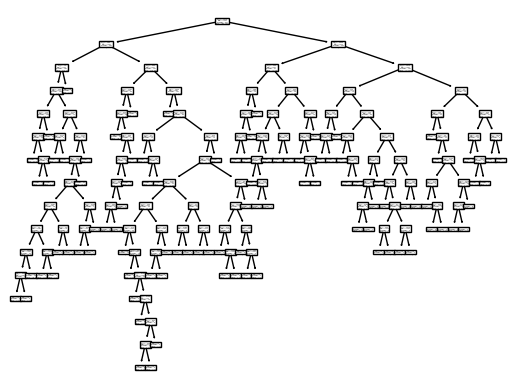

In [8]:
from sklearn import tree
tree.plot_tree(model)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv.fit(X_train, y_train)
gscv.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 20}